<a href="https://colab.research.google.com/github/guupys/Temp/blob/main/NS_0201w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 改善案のFastTextについて

メモ：学習時のべうとる次元数の目安<br>
参照：https://dot-blog.jp/news/fasttext-natural-language-machine-learning-tutorial/<br>
小規模コーパス(～50M words):100次元<br>
中規模コーパス(～200M words):200次元<br>
大規模コーパス(300M～ words):300次元<br>

モデルの種類について<br>
参照：https://torch.classcat.com/2018/07/09/fasttext-tutorials-word-representations/<br>
基本的にはSkipgramの方が良い？

In [1]:
!pip install japanize-matplotlib | tail -n 1

## 学習済みのFastTextの利用

In [ ]:
import gensim
# 学習済モデルのパス
model_path = './drive/MyDrive/FastText/cc.ja.300.vec.gz'
# ロードに10分くらいかかる
model = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)

In [ ]:
# 登録している単語の数
print("vocab :", len(model.vocab.keys())) # 2000000
# ひとつの単語ベクトルの次元
print("vector dim :", model['猫'].shape) # (300,)
# 類似語検索
model.most_similar(positive=['姪', '男性'], negative=['女性'])

vocab : 2000000
vector dim : (300,)


[('甥', 0.8209505081176758),
 ('叔父', 0.6412274837493896),
 ('叔母', 0.6293267011642456),
 ('従姉', 0.6224151849746704),
 ('弟', 0.6069883108139038),
 ('従兄', 0.595562756061554),
 ('従姉妹', 0.594235360622406),
 ('伯父', 0.5939351916313171),
 ('義妹', 0.5894800424575806),
 ('従兄弟', 0.5876302719116211)]

In [ ]:
# 類似度計算
print("猫 - 犬 :", model.similarity('猫', '犬'))
print("猫 - 人 :", model.similarity('猫', '人'))

猫 - 犬 : 0.65053856
猫 - 人 : 0.23371725


In [ ]:
import numpy as np

# 入力した単語に類似した単語とベクトルを返す
def similars(words, model):
    vectors = []
    cluster = []
    label = []
    for i in range(len(words)):
        word = words[i]
        similar = model.similar_by_word(word, topn=10)
        for x in similar:
            cluster.append(i)
            label.append(word)
            vectors.append(model[x[0]])   # 類似語のベクトル格納
    return vectors, cluster, label

words = ['猫', '銃', '鉄', '病原菌']
vectors, cluster, label = similars(words, model)

# ベクトルの次元を確認
print(np.array(words).shape)   # wordsの種類
print(np.array(cluster).shape) # wordsの種類×topnの数=40
print(np.array(vectors).shape) # 40個の単語について300次元のベクトル

# 類似した単語の確認
for word in words:
    similar = model.similar_by_word(word, topn=10)
    print(word, [x[0] for x in similar])

(4,)
(40,)
(40, 300)
猫 ['ネコ', 'ねこ', '子猫', '仔猫', 'ニャンコ', '野良猫', '犬', 'ミケ', '野良ねこ', '飼猫']
銃 ['拳銃', '銃器', '短銃', '小銃', 'ダルヌ', '猟銃', 'アサルトライフル', '散弾', 'レムリカ', '蟲砕']
鉄 ['拐仙', '蕉館', '勒諸', 'ワン・アンダードッグ', '拐山', 'ブリキンガー', '珪輝', '拐李', 'ぱいぷ', '鋼鉄']
病原菌 ['病原', '細菌', 'ウイルス', 'ばい菌', 'エボラウィルス', '伝染病', '感染', '菌', 'ウィルス', 'ゾンビウィルス']


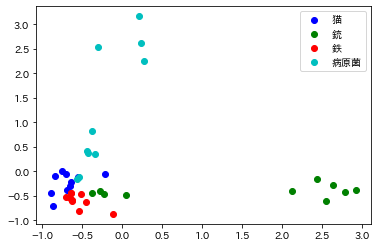

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import japanize_matplotlib 

def draw_scatter_plot(vectors, words, cluster):
    # 色の設定
    colors = ["b", "g", "r", "c", "m", "y", "k"]
    # 各単語を2次元に圧縮して、可視化のためにx, yに格納
    pca = PCA(n_components=2)
    coords = pca.fit_transform(vectors)
    x = [v[0] for v in coords]
    y = [v[1] for v in coords]
    # matplotlibによる可視化
    fig, ax = plt.subplots()
    for i in range(len(words)):
        xx = []
        yy = []
        for c, a, b in zip(cluster, x, y):
            if i == c:
                xx.append(a)
                yy.append(b)
        ax.scatter(xx, yy, c=colors[i % 7], label=words[i])
    ax.legend(loc='upper right')
    plt.show()

draw_scatter_plot(vectors, words, cluster)

In [4]:
# 形態素分析ライブラリーMeCab と 辞書(mecab-ipadic-NEologd)のインストール 
!apt-get -q -y install sudo file mecab libmecab-dev mecab-ipadic-utf8 git curl python-mecab > /dev/null
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git > /dev/null 
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n > /dev/null 2>&1
!pip install mecab-python3 > /dev/null

# シンボリックリンクによるエラー回避
!ln -s /etc/mecabrc /usr/local/etc/mecabrc

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
^C


In [5]:
!echo `mecab-config --dicdir`"/mecab-ipadic-neologd"

/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd


In [6]:
import MeCab
m=MeCab.Tagger('-Owakati')
sample_txt = "彼女はペンパイナッポーアッポーペンと恋ダンスを踊った。"
print(m.parse(sample_txt))

彼女 は ペンパイナッポーアッポーペン と 恋 ダンス を 踊っ た 。 



In [ ]:
def sentence_vector(sentence, unknowns=[]):
    """
    文章ベクトルを求める関数。
    300次元のベクトルを返す。未知の単語で文章ベクトルが求められないときはNoneを返す。
    @param sentence 文章
    @param unknowns 不明な語があったら格納する配列。呼び出しもとから渡すこと。
    """
    _sv = np.empty((0,300), np.float32)
    for w in m.parse(sentence).split():
        try:
          wv = model[w]
          _sv = np.append(_sv, np.array([wv]), axis=0)
        except KeyError:
          if w not in unknowns:
            unknowns.append(w)
    if _sv.shape[0]>0:
      return np.array([np.average(_sv, axis = 0)])
    else:
      print('Ignore sentence', sentence)
      return None

In [ ]:
print(sentence_vector('レストランの予約がしたいのですが'))

NameError: ignored

In [ ]:
import pandas as pd

# 質問リストのCSVを読み込む。
# 質問種別,質問文、の形式になっている。
# index_col=Falseを付けないと1列目の数字を正しく読まない
features_df = pd.read_csv('sample_corpus1.csv',encoding="cp932", index_col=False, dtype=str)
categories = features_df['category'].astype('category').cat.codes.values.tolist()
catnum = max(categories)+1
print('corpus size:',features_df['input'].size)
print('categories:',catnum)

# 質問リストの先頭を表示
print(features_df.head())

# すべての質問文に対して文章ベクトルを求める
unknowns = []
sv = np.empty((0,300), np.float32)
for sentence in features_df['input']:
    _sv = sentence_vector(sentence, unknowns)
    if _sv is not None:
      sv = np.append(sv, np.array([np.average(_sv, axis = 0)]), axis=0)
print('unknown words:',unknowns)
print('vector size:',sv.shape)

FileNotFoundError: ignored

reduced vector size: (257, 2)


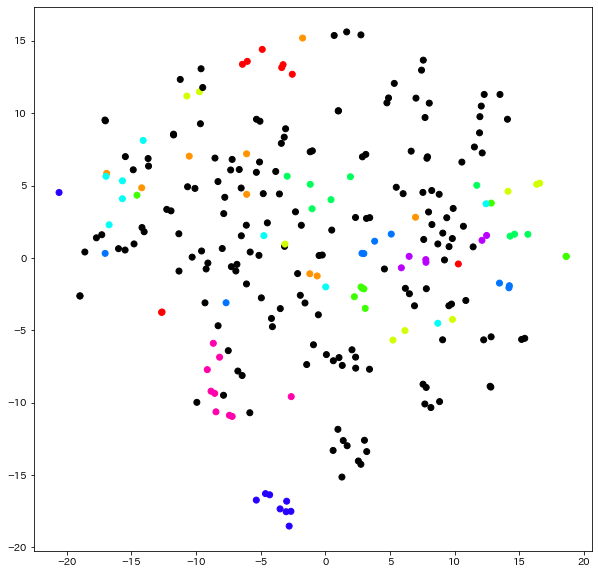

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

sv_tsne = TSNE(n_components=2, random_state=0).fit_transform(sv)
print('reduced vector size:',sv_tsne.shape)

# 先頭から10カテゴリまで色付け、それ以外は黒でプロット。
colors = [cm.hsv(i/10) if i < 10 else (0,0,0,1) for i in categories]
#colors = [cm.hsv(i/10) for i in categories]
plt.figure(figsize=(10, 10))
plt.scatter(sv_tsne[:, 0], sv_tsne[:, 1], c=colors)

## FastTextの学習検討

In [2]:
#パッケージのインストール
!pip install fasttext | tail -n 1

In [11]:
# 分かち書きの文章準備
with open("./drive/MyDrive/Classification.txt", encoding="utf-8") as f:
  data = f.readlines()

# 今回は文章だけを抽出
text_list = []
for idx in range(len(data)):
  data_list = data[idx].split("\t")
  #text = data_list[1].replace("\n","")
  text = m.parse(data_list[1])
  text_list.append(text)

In [8]:
import os
os.listdir()

['.config', 'drive', 'mecab-ipadic-neologd', 'sample_data']

In [10]:
with open("./drive/MyDrive/wakati_Classification.txt", "x", encoding="utf-8") as f:
  f.writelines(text_list)

FileExistsError: ignored

In [12]:
# 動作確認
import fasttext
model_ft = fasttext.train_unsupervised('./drive/MyDrive/wakati_Classification.txt', model='skipgram')

色々な記事を見る限り、ハイパラでかなりベクトルが変わるっぽい<br>
```
The following arguments for the dictionary are optional:
  -minCount           minimal number of word occurrences [1]
  -minCountLabel      minimal number of label occurrences [0]
  -wordNgrams         max length of word ngram [1]
  -bucket             number of buckets [2000000]
  -minn               min length of char ngram [0]
  -maxn               max length of char ngram [0]
  -t                  sampling threshold [0.0001]
  -label              labels prefix [__label__]

The following arguments for training are optional:
  -lr                 learning rate [0.1]
  -lrUpdateRate       change the rate of updates for the learning rate [100]
  -dim                size of word vectors [100]
  -ws                 size of the context window [5]
  -epoch              number of epochs [5]
  -neg                number of negatives sampled [5]
  -loss               loss function {ns, hs, softmax} [softmax]
  -thread             number of threads [12]
  -pretrainedVectors  pretrained word vectors for supervised learning []
  -saveOutput         whether output params should be saved [0]

The following arguments for quantization are optional:
  -cutoff             number of words and ngrams to retain [0]
  -retrain            finetune embeddings if a cutoff is applied [0]
  -qnorm              quantizing the norm separately [0]
  -qout               quantizing the classifier [0]
  -dsub               size of each sub-vector [2]
```



In [13]:
print(len(model_ft.words))   # vocab数
print(model_ft['有機'].shape)   # 100次元

2391
(100,)


In [17]:
model_ft.save_model("test_model.bin")   # save_modelに対応しているのは.binだけ

In [18]:
from fasttext import load_model

# original BIN model loading
f = load_model("test_model.bin")

# get all words from model
words = f.get_words()

# binからのvecファイル作成
with open('./drive/MyDrive/test_fasttext.vec','w', encoding="utf-8") as file_out:
    # the first line must contain number of total words and vector dimension
    file_out.write(str(len(words)) + " " + str(f.get_dimension()) + "\n")
    # line by line, you append vectors to VEC file
    for w in words:
        v = f.get_word_vector(w)
        vstr = ""
        for vi in v:
            vstr += " " + str(vi)
        try:
            file_out.write(w + vstr+'\n')
        except:
            pass

In [14]:
# 元のモデルの分散表現
model_ft['有機']

array([-0.2307631 ,  0.48616007,  0.07909437,  0.27160865,  0.5513428 ,
        0.33643183,  0.14443454, -0.14305763,  0.4291587 ,  0.2265924 ,
        0.25130743,  0.49449974,  0.3395594 , -0.2310876 , -0.34252554,
       -0.21994925, -0.02105968, -0.2609067 , -0.13290991, -0.17853916,
       -0.09475432,  0.26901558,  0.57578444,  0.06363399, -0.05231218,
        0.32009643,  0.29915708, -0.24263121,  0.06527887,  0.17349814,
       -0.04869232, -0.3882302 , -0.05664854, -0.1567582 , -0.33545876,
       -0.48236114,  0.2029171 , -0.02290487, -0.13318653,  0.0105214 ,
       -0.01744312,  0.11146604, -0.11659017,  0.1461581 ,  0.4415756 ,
       -0.2991585 , -0.03221069, -0.11805682, -0.4914365 , -0.18963744,
       -0.28267518,  0.05663749, -0.5116369 ,  0.13559352, -0.81729144,
        0.20796913, -0.2160092 ,  0.11624551, -0.09322718,  0.03232428,
       -0.23828712, -0.11785129,  0.10440815,  0.6642458 , -0.03712737,
        0.1575549 , -0.3023479 ,  0.22212513,  0.21773072, -0.00

注意！<br>
fasttextのモデルだと訓練時に使用していない単語もベクトル化する<br>
サブワード分割して単語がある限りは、分割したサブワードの合計を出力する<br>
元のモデルで「有機EL」をベクトルに出来てもgensimでは出来なかったから判明<br>
この機能で派生語などに対応している

In [19]:
import gensim
# fastTextで作成したモデルをgensimで読み込んで出力した分散表現
model_path = './drive/MyDrive/test_fasttext.vec'
model_tf2 = gensim.models.KeyedVectors.load_word2vec_format(model_path, binary=False)
all(model_tf2['有機'] == model_ft['有機'])

True

## 学習したFastTextモデルで可視化

In [20]:
# 入力文章を分かち書きにして、各単語のベクトルを格納
def sentence_vector(sentence, unknowns=[]):
    m=MeCab.Tagger('-Owakati')
    _sv = np.empty((0,100), np.float32)
    for w in m.parse(sentence).split():  # 文章中の各単語のベクトルを格納
        try:
          wv = model_tf2[w]
          _sv = np.append(_sv, np.array([wv]), axis=0)
        except KeyError:
          if w not in unknowns:
            unknowns.append(w)
    if _sv.shape[0]>0:
      return np.array([np.average(_sv, axis = 0)])  # 各次元の平均を取って文章ベクトルとする
    else:
      print('Ignore sentence', sentence)   # もし全て未知語なら何もしない
      return None

In [21]:
import pandas as pd

with open("./drive/MyDrive/Classification.txt", encoding="utf-8") as f:
  data = f.readlines()

# 今回は文章だけを抽出
text_list = []
label_list = []
for idx in range(len(data)):
  data_list = data[idx].split("\t")
  text = data_list[1].replace("\n","")
  label = data_list[0]
  text_list.append(text)
  label_list.append(label)
text_df = pd.DataFrame({"text":text_list, "label":label_list})
categories = text_df['label'].astype('category').cat.codes.values.tolist()
catnum = max(categories)+1
print('corpus size:',text_df['text'].size)
print('categories:',catnum)

corpus size: 4264
categories: 7


In [24]:
import numpy as np
# すべての質問文に対して文章ベクトルを求める
unknowns = []
sv = np.empty((0,100), np.float32)
for sentence in text_df['text']:
    _sv = sentence_vector(sentence, unknowns)
    if _sv is not None:
      sv = np.append(sv, np.array([np.average(_sv, axis = 0)]), axis=0)
print('unknown words:',unknowns)
print('vector size:',sv.shape)

unknown words: ['フェナントロリン', 'ＮＢｐｈｅｎ', '刃', 'ＤＢｑ', '叉', '強める', 'フォトエレクトロニクスデバイス', '≦（', '該微', 'Ｖｓｓ', 'Ｖｃａｔ', 'Ｖａｎｏ', '環状', '谷', '山側', '傾向', 'リング', '指', '学', '超え', '該曲', '向かい合う', '板の間', '各回', '短期間', '同時', 'ｕ', 'り', 'Ｑ２', '帯域', 'はずれる', 'なかなか', '戻ら', 'はずれ', '戻す', '折り畳ん', 'カバーフィルム', 'にわたって', '離隔', 'クライオポンプ', '排気', '指紋', '兼ね備え', '検討', '引っ張り', '可変', '重心', '最小', '｜', '発し', '受', 'ベンゾナフトフラニル', 'アン', 'トリル', 'ｋＰａ', 'ＬＰＳＡＳ', 'ベンゾフロピリダジン', 'いい', '－［', '’’－（', '’’－', 'テルフェニル', 'ジメチル', 'ｏＹＧＴＢｉＦ', '回廊', 'ＩＮ', 'ＯＵＴ', '過多', '本明', '細書', '該熱', '描く', 'アシスト', '硬度', '狭い', '空け', 'Ｈｅｔ', '価', 'メタフェニレン', '分析計', 'ソースドレイン', '入れ換える', 'ナフトフロピラジン', 'ジピバロイルメタナト', '向ける', '近赤外線', '近', 'ほか', 'ランタン', 'きわめて', '禁制', '境', '向い', '隔て', '磁気', '折りたたん', '磁力', '希少', 'ＲＧＢＹ', '向かい合い', 'インターフェース', '平方根', 'ロール', '巻か', 'とる', '引き出さ', '強く', '各層', '枠組み', 'アミノピレン', 'B', '110', '加わり', 'つながる', '招き', 'パワー', '向う', '途中', '閉じ込め', '高まる', 'キャンセル', 'リチウム', '体積', '可塑', '外装', '圧する', 'その間', '折れ曲がっ', 'ポリイミド', 'ＬＣ', 'ＭＳ', '反り', 'テスト', 'パストランジスタロジック', '検証

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


reduced vector size: (4264, 2)


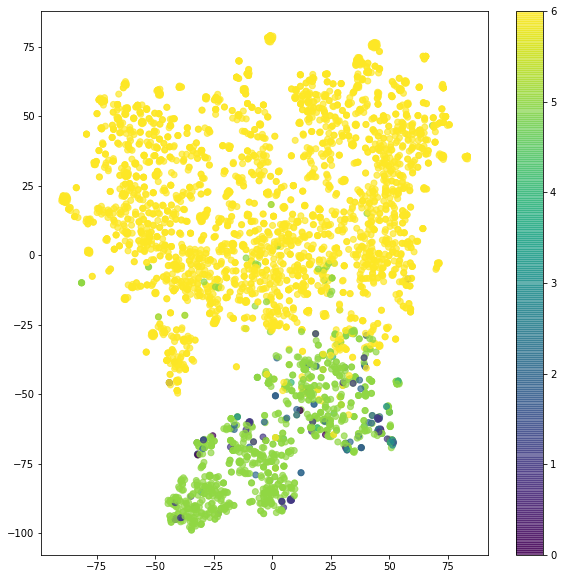

In [25]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt

sv_tsne = TSNE(n_components=2, random_state=0).fit_transform(sv)
print('reduced vector size:',sv_tsne.shape)

plt.figure(figsize=(10, 10))
plt.scatter(sv_tsne[:, 0], sv_tsne[:, 1], c=categories, alpha=0.7)
plt.colorbar()
plt.show()

In [26]:
# 分かち書きの文章準備
with open("./drive/MyDrive/Classification.txt", encoding="utf-8") as f:
  data = f.readlines()

# 今回はラベルだけを抽出
lab_list = []
for idx in range(len(data)):
  data_list = data[idx].split("\t")
  label = data_list[0]
  #text = m.parse(data_list[1])
  lab_list.append(label)

In [ ]:
plot_lab = ["T"]
plot_idx = [main_df.index[main_df["label"] == i].tolist() for i in plot_lab]

for lab, idx in zip(plot_lab, plot_idx):
    xx = [x[i] for i in idx]
    yy = [y[i] for i in idx]
    plt.scatter(xx, yy, label = "Target", marker="*", color="red", s=150, alpha=1)
    
plot_lab = ["AA", "A", "B", "C", "D"]
plot_idx = [main_df.index[main_df["label"] == i].tolist() for i in plot_lab]

for lab, idx in zip(plot_lab, plot_idx):
    xx = [x[i] for i in idx]
    yy = [y[i] for i in idx]
    plt.scatter(xx, yy, label = lab, s=20, alpha=0.4)

plot_lab = ["Z", "nan"]
plot_idx = [main_df.index[main_df["label"] == i].tolist() for i in plot_lab]

for lab, idx in zip(plot_lab, plot_idx):
    xx = [x[i] for i in idx]
    yy = [y[i] for i in idx]
    plt.scatter(xx, yy, label = lab, s=5, alpha=0.2)

plt.legend(bbox_to_anchor=(1.05,1))
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Abstract Emb by Word2vec")
plt.show()

In [29]:
lab_list.index[lab_list =="AA"]

TypeError: ignored

MeCabじゃなくてもいい？<br>
Sentencepieceとかで分かち書きにして学習させるのもあり？<br>
sentencepieceで単語分割して出てきた頻出単語(長めの単語)をMecabに追加するとか？

MeCabに追加するのはかなり面倒そう<br>
スコアとか品詞とかが要る<br>
huggingfaceの追加を検討

# 独自の辞書の作成について

## SentencePieceモデルの作成

In [ ]:
!pip install sentencepiece | tail -n 1

In [ ]:
import sentencepiece as spm

# 学習用の文章準備
with open("./drive/MyDrive/Classification.txt", encoding="utf-8") as f:
  data = f.readlines()

# 今回は文章だけを抽出
text_list = []
for idx in range(len(data)):
  data_list = data[idx].split("\t")
  text = data_list[1]
  text_list.append(text)

#with open("./drive/MyDrive/sentences.txt", "x", encoding="utf-8") as f:
#  f.writelines(text_list)
# vocab_sizeはdefault=8000だけどfastTextのsizeが2400くらいなので2000まで削減
spm.SentencePieceTrainer.Train(
    '--input=./drive/MyDrive/sentences.txt, --model_prefix=./drive/MyDrive/sentencepiece_2000 --character_coverage=0.9995 --vocab_size=2000 --pad_id=3'
)

In [ ]:
sp = spm.SentencePieceProcessor()
sp.Load("./drive/MyDrive/sentencepiece_2000.model")

True

In [ ]:
text_list[0]

'非発光時に背面側の様子を観察可能な発光装置、照明装置、または表示装置などを提供する。複数の発光部を有し、発光部以外の領域は、可視光を透過する領域を有する発光装置である。または、複数の可視光を透過する透光部を有し、透光部以外の領域に、発光することが可能な発光部を有する発光装置である。非発光時には、可視光を透過する領域を介して発光装置の背面側の様子を視認することができる。また、発光時には、発光部から発せられた光の拡散により、発光装置の背面側の様子を視認しにくくすることが可能である。\n'

In [ ]:
print(sp.EncodeAsPieces(text_list[0]))

['▁', '非', '発光', '時', 'に', '背', '面', '側', 'の', '様', '子', 'を', '観', '察', '可能な', '発光装置', '、', '照明装置', '、', 'または', '表示装置', 'など', 'を提供する', '。', '複数の', '発光', '部', 'を有し', '、', '発光', '部', '以外', 'の領域は', '、', '可視光', 'を', '透過', 'する', '領域を有する', '発光装置', 'である', '。', 'または', '、', '複数の', '可視光', 'を', '透過', 'する', '透', '光', '部', 'を有し', '、', '透', '光', '部', '以外', 'の', '領域に', '、', '発光する', 'ことが可能な', '発光', '部', 'を有する発光装置', 'である', '。', '非', '発光', '時', 'には', '、', '可視光', 'を', '透過', 'する', '領域', 'を介して', '発光装置', 'の', '背', '面', '側', 'の', '様', '子', 'を', '視', '認', 'することができる', '。', 'また', '、', '発光', '時', 'には', '、', '発光', '部', 'から', '発', 'せ', 'られ', 'た', '光', 'の', '拡', '散', 'により', '、', '発光装置', 'の', '背', '面', '側', 'の', '様', '子', 'を', '視', '認', 'し', 'に', 'く', 'く', 'すること', 'が可能で', 'ある', '。']


In [ ]:
print("語彙数:", sp.GetPieceSize())

語彙数: 2000


## SentencePieceモデルからのVocab取り出し

In [ ]:
# sentencepieceからのvocab取り出し
vocabs = [sp.IdToPiece(id) for id in range(sp.GetPieceSize())]
print(vocabs[:20])

['<unk>', '<s>', '</s>', '<pad>', 'の', '、', '。', '第', '1', '2', 'と', 'を', 'は', 'に', 'が', 'する', '▁', '3', 'を有する', 'し']


In [ ]:
sorted_vocab = sorted(vocabs, key=len, reverse=True)
print(sorted_vocab[:20])
# 各特許に共通する長い表現が多い

['▁酸化物半導体を用いた半導体装置', '発光効率の高い発光素子を提供する', '利便性または信頼性に優れた新規な', '信頼性の高い半導体装置を提供する', '発光効率が高い発光素子を提供する', '発光装置および電子機器を提供する', 'ソース電極層及びドレイン電極層', 'トランジスタを有する半導体装置', '信頼性の高い発光装置を提供する', '寿命の長い発光素子を提供する', '▁外部量子効率が高い発光素子', '燐光性化合物の吸収スペクトル', 'を提供することを課題とする', 'ソース電極及びドレイン電極', '安定した電気的特性を付与し', '発光性の有機化合物を含む層', 'ソース領域及びドレイン領域', 'エレクトロルミネッセンス層', '置換もしくは無置換の炭素数', 'を提供することを課題の一']


In [ ]:
pick_vocab = [voc for voc in sorted_vocab if len(voc) == 4]
print(pick_vocab[:10]) # 文字数指定だと要らない表現も多い？

['</s>', 'を有する', '発光素子', 'において', '発光装置', 'を形成し', '表示装置', 'を介して', 'を用いて', '半導体層']


In [ ]:
import time
import sys
from itertools import chain
from collections import defaultdict, Counter
from multiprocessing import Pool
from functools import partial
from math import log
from torch.nn.utils.rnn import pad_sequence

In [ ]:
def spm_process(sent):
    return sp.EncodeAsPieces(sent)

def spm_counter(text, nthreads=2):
    vocab_counter = Counter()
    with Pool(nthreads) as p:   # 並列処理
        vocab_counter.update(chain.from_iterable(p.map(spm_process, text)))  # 与えたコーパスのtokenの出現頻度を計算
    return vocab_counter

In [ ]:
vocab_counter = spm_counter(text_list)

In [ ]:
# counterを出現頻度順に並び替え
print(vocab_counter.most_common()[30:70])  # 結構色々な表現がある　前記第～　とかの数値表現どうする？
# 3文字以上を試しに抽出
counter_list = [count for count in vocab_counter.most_common() if len(count[0]) >= 3]
print("filter前:", len(vocab_counter), ", filter後", len(counter_list))
counter_list[:30]  # いい感じかな？

[('において', 1415), ('前記', 1401), ('を含む', 1372), ('酸化物半導体層', 1342), ('な', 1328), ('ス', 1326), ('4', 1294), ('化', 1251), ('した', 1247), ('光', 1237), ('ッ', 1209), ('である', 1192), ('性', 1190), ('ル', 1186), ('た', 1174), ('材料', 1137), ('薄膜トランジスタ', 1112), ('から', 1111), ('上に', 1100), ('部', 1068), ('を提供する', 1064), ('酸化物半導体膜', 1045), ('トランジスタ', 1033), ('とする', 1025), ('の電極', 1023), ('発光装置', 1021), ('して', 1020), ('素子', 1008), ('膜', 1003), ('用', 1000), ('された', 987), ('EL', 965), ('該', 965), ('を形成し', 958), ('を形成する', 937), ('基板', 910), ('領域', 907), ('ク', 883), ('5', 883), ('および', 880)]
filter前: 2190 , filter後 753


[('を有する', 2901),
 ('発光素子', 2278),
 ('を有し', 1999),
 ('または', 1677),
 ('において', 1415),
 ('を含む', 1372),
 ('酸化物半導体層', 1342),
 ('である', 1192),
 ('薄膜トランジスタ', 1112),
 ('を提供する', 1064),
 ('酸化物半導体膜', 1045),
 ('トランジスタ', 1033),
 ('とする', 1025),
 ('の電極', 1023),
 ('発光装置', 1021),
 ('された', 987),
 ('を形成し', 958),
 ('を形成する', 937),
 ('および', 880),
 ('として', 852),
 ('表示装置', 845),
 ('ことができる', 825),
 ('及び第', 808),
 ('される', 757),
 ('半導体装置', 746),
 ('前記第', 726),
 ('複数の', 673),
 ('よりも', 635),
 ('のトランジスタ', 620),
 ('の基板', 585)]

## 得られた語彙をtokenizerに追加

In [ ]:
!pip install transformers | tail -n 1
!pip install fugashi | tail -n 1
!pip install ipadic | tail -n 1

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("cl-tohoku/bert-base-japanese-whole-word-masking")
print(tokenizer.tokenize(text_list[0]))

Downloading:   0%|          | 0.00/110 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/479 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/252k [00:00<?, ?B/s]

['非', '発光', '時', 'に', '背面', '側', 'の', '様子', 'を', '観察', '可能', 'な', '発光', '装置', '、', '照明', '装置', '、', 'または', '表示', '装置', 'など', 'を', '提供', 'する', '。', '複数', 'の', '発光', '部', 'を', '有し', '、', '発光', '部', '以外', 'の', '領域', 'は', '、', '可視', '光', 'を', '透過', 'する', '領域', 'を', '有する', '発光', '装置', 'で', 'ある', '。', 'または', '、', '複数', 'の', '可視', '光', 'を', '透過', 'する', '透', '光', '部', 'を', '有し', '、', '透', '光', '部', '以外', 'の', '領域', 'に', '、', '発光', 'する', 'こと', 'が', '可能', 'な', '発光', '部', 'を', '有する', '発光', '装置', 'で', 'ある', '。', '非', '発光', '時', 'に', 'は', '、', '可視', '光', 'を', '透過', 'する', '領域', 'を', '介し', 'て', '発光', '装置', 'の', '背面', '側', 'の', '様子', 'を', '視認', 'する', 'こと', 'が', 'できる', '。', 'また', '、', '発光', '時', 'に', 'は', '、', '発光', '部', 'から', '発せ', 'られ', 'た', '光', 'の', '拡散', 'により', '、', '発光', '装置', 'の', '背面', '側', 'の', '様子', 'を', '視認', 'し', 'にくく', 'する', 'こと', 'が', '可能', 'で', 'ある', '。']


In [ ]:
# デフォルトの辞書確認
print(len(tokenizer.vocab))  # 長さは32000
# 辞書型なので、keyを抽出
default_key = tokenizer.vocab.keys()

32000


In [ ]:
# spmの頻出後の内、元の辞書に含まれていない単語を抽出
spm_token_list = [token[0] for token in counter_list]   #単語部分だけを抽出
add_token = [token for token in spm_token_list if token not in default_key]
nadd_token =[token for token in spm_token_list if token in default_key]
print("照合前:", len(spm_token_list), "照合後:", len(add_token), "除去:", len(nadd_token))

照合前: 753 照合後: 655 除去: 98


In [ ]:
# 確認
check_list = []
for token in spm_token_list:
  token_id = tokenizer.encode(token, add_special_tokens=False)   # FalseにしないとCLSとSEPが付く
  if len(token_id) == 1 or token_id == [tokenizer.unk_token_id]:
    check_list.append(token)   # これが追加されたtoken
len(check_list)

96

In [ ]:
error_word = [word for word in nadd_token if word not in check_list]
error_word

['させる', 'なおかつ']

In [ ]:
"なおかつ" in default_key

True

In [ ]:
tokenizer.encode("なおかつ", add_special_tokens=False)

[521, 772]

vocabにあるはずなのにencodeでは分割される⇒なぜ？

In [ ]:
print("追加前:", len(tokenizer.vocab))
num_added_toks = tokenizer.add_tokens(add_token)
print("追加後:", len(tokenizer.vocab))

追加前: 32000
追加後: 32000


encodeで[unk]認定されない限り追加はされない

いったん保留

# 単語の重み検討

## IDF辞書作成 (BERT Score参照)

In [ ]:
m=MeCab.Tagger('-Owakati')

def idf_process(sent):
    token = m.parse(sent).split(" ")
    return set(token)

def get_idf_dict(arr, nthreads=2):
    idf_count = Counter()   # tokenのカウント
    num_docs = len(arr)

    with Pool(nthreads) as p:   # 並列処理
        idf_count.update(chain.from_iterable(p.map(idf_process, arr)))  # 与えたコーパスのtokenの出現頻度を計算

    idf_dict = defaultdict(lambda: log((num_docs + 1) / (1)))   # 初期値を変更 log(全文書数+1/1)
    idf_dict.update({idx: log((num_docs + 1) / (c + 1)) for (idx, c) in idf_count.items()})  # IDF計算 log(全文書数+1/出現数+1) pythonの初期値が0のため+1の処理
    return idf_dict

In [ ]:
idf_dict = get_idf_dict(text_list)

In [ ]:
print(len(idf_dict))
# fastTextのvocab数より多くなっている⇒fastTextの方はsubwordで減っている？

4447


## TF辞書作成

In [ ]:
from collections import defaultdict

def get_tf_dict(sent):
  token = m.parse(text_list[0]).split(" ")
  num_token = len(token)
  tf_counter = Counter(token)
  tf_dict = defaultdict(lambda: 0)   # 初期値0の辞書
  tf_dict.update({idx: ((c + 1) / (num_token + 1)) for (idx, c) in tf_counter.items()})
  return tf_dict

In [ ]:
test_dict = get_tf_dict(text_list[0])
len(test_dict)

50

TFの計算は出来たけど文章長さでベクトルの絶対値が大きく変わりそう<br>
最後に文章長さで平均取れば問題ない？

## SklearnでのTF-IDF算出

直接算出する場合

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

tfidf_text = []
for i in range(len(text_list)):
  tfidf_text.append(m.parse(text_list[i]).strip())

vectorizer.fit(tfidf_text)
vec_tfidf = vectorizer.transform(tfidf_text)

In [ ]:
print(vec_tfidf.shape)
print(vec_tfidf[0].sum())
print(vec_tfidf[1].sum())
print(vec_tfidf[2].sum())

(4264, 3827)
4.30136993764376
4.30136993764376
4.7829729391683395


TF(出現頻度の行列)から算出する場合

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(tfidf_text)
X = vectorizer.transform(tfidf_text)
print(vectorizer.get_feature_names())
print(len(vectorizer.get_feature_names()))
print(X.shape)

['10', '101', '102', '103', '104', '105', '106', '107', '108', '11', '110', '112', '1130', '12', '1212', '122', '1230', '126', '1300', '132', '134', '136', '138', '1400', '142', '147', '152', '193', '403', '404', '405', '406', '407', '408', '409', '470', '502', '504', '505', '506', '507', '508', '650', '651', '740', 'chiponglass', 'cm', 'el', 'emicalmechanicalpolishing', 'en', 'fet', 'ii', 'iii', 'lang', 'mos', 'nm', 'noccupiedmolecularorbital', 'tapeautomatedbonding', 'tapecarrierpackage', 'us', 'vds', 'vgs', 'vth', 'あい', 'あう', 'あたり', 'あっ', 'あと', 'あまり', 'あらかじめ', 'あらゆる', 'あり', 'ある', 'あるいは', 'ある程度', 'あれ', 'あわ', 'あわせ', 'あわせる', 'いい', 'いう', 'いえ', 'いかなる', 'いく', 'いずれ', 'いま', 'いまだ', 'いる', 'いれ', 'いろいろ', 'いわゆる', 'うち', 'うる', 'おい', 'おおむね', 'おき', 'おく', 'おけ', 'おこし', 'おこない', 'おこなう', 'おこなわ', 'および', 'おら', 'おり', 'お互い', 'かかり', 'かかる', 'かかわる', 'かけ', 'かける', 'かつ', 'から', 'きい', 'きっかけ', 'きる', 'きれ', 'きれい', 'きわめて', 'くっきり', 'くびれ', 'くる', 'くん', 'こう', 'こうして', 'ここ', 'こと', 'ことなる', 'この', 'こみ', 'これ', 'これら', 'こん', 'ごく', 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
print(tfidf.shape)
print(tfidf[0].sum())
print(tfidf[1].sum())
print(tfidf[2].sum())

(4264, 3827)
4.268913343992472
4.268913343992472
4.768675102148696


# Fine-Tuningのパラメータ最適化

In [ ]:
!pip install optuna | tail -n 1

In [ ]:
import os
import time
import tqdm
import argparse
import random
import numpy as np
import pandas as pd

from sklearn.utils import class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from transformers import BertModel, BertConfig
from transformers import BertJapaneseTokenizer

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
# 乱数シード固定（再現性の担保）
def fix_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True  # Pytorchの再現性確保
    torch.backends.cudnn.benchmark = False     # True:再現性無くなるが高速化

seed = 42
fix_seed(seed)

# データローダーのサブプロセスの乱数seedが固定
def worker_init_fn(worker_id):
    np.random.seed(np.random.get_state()[1][0] + worker_id)

## 1-1. 元データの読込

In [ ]:
with open("./drive/MyDrive/Classification.txt", encoding="utf-8") as text:
    data = text.readlines()

In [ ]:
label_list = []
text_list  = []
for i in range(len(data)):
    label, text = data[i].split("\t")   # labelとtextを\tで分割
    text = text.replace("\n","")        # 最後の改行を除去
    label_list.append(label)
    text_list.append(text)

## 1-4. 2値分類のデータ作成

In [ ]:
label_dict = {"AA":1, "A":1, "B":1, "C":1, "D":0, "Z":0, "nan":0}
label_list_onehot = []
for i in range(len(label_list)):
    new_label = label_dict[label_list[i]]
    label_list_onehot.append(new_label)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_list, label_list_onehot, test_size=0.2, random_state=seed, stratify=label_list_onehot)
print("train:", len(X_train), ", test:", len(X_test))

train: 3411 , test: 853


## 2-1 2文入力タスクのためのデータ準備

In [ ]:
dir_name = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tknz = BertJapaneseTokenizer.from_pretrained(dir_name)
bert = BertModel.from_pretrained(dir_name)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


target.txt無いから代用

In [ ]:
# ２文入力の作成
ref = X_train[0]
X_train_pair = [tknz.sep_token.join([ref, sent]) for sent in X_train]
X_test_pair  = [tknz.sep_token.join([ref, sent]) for sent in X_test]

## 2-2. バッチ処理有り・重み無し

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
class Dcl_Dataset(Dataset):
    def __init__(self, xdata, ydata):
        self.data = xdata
        self.label = ydata
    def __len__(self):
        return len(self.label)
    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.label[idx]
        return (x,y)

def Dcl_collate_fn(batch):
    texts, labels= list(zip(*batch))
    tokens = list([tknz.encode(text) for text in texts])
    labels = list(labels)
    return tokens, labels

In [ ]:
# batch処理に対応するため、bertのforward部分を修正
class DocCls(nn.Module):
    def __init__(self, bert):
        super().__init__()
        self.bert = bert
        self.cls  = nn.Linear(768, 2)
    
    def forward(self,x1,x2):
        bout = self.bert(input_ids=x1, attention_mask=x2)
        bs   = len(bout[0])
        h0   = [bout[0][i][0] for i in range(bs)]
        h0 = torch.stack(h0, dim=0)
        return self.cls(h0)

In [ ]:
# 結果出力用の関数定義
def check_score(true_list, pred_list, multi=False):
    if multi:
        acc  = accuracy_score(true_list, pred_list)
        rec  = recall_score(true_list, pred_list, average=None)
        f1   = f1_score(true_list, pred_list, average=None)
    else:
        acc  = accuracy_score(true_list, pred_list)
        rec  = recall_score(true_list, pred_list)
        f1   = f1_score(true_list, pred_list)
    return acc, rec, f1

In [ ]:
batch_size = 5
train_set = Dcl_Dataset(X_train_pair, y_train)
train_loader = DataLoader(train_set, batch_size=batch_size,
                          shuffle=True, collate_fn=Dcl_collate_fn,
                          num_workers=2, pin_memory=True, worker_init_fn=worker_init_fn)
test_set = Dcl_Dataset(X_test_pair, y_test)
test_loader = DataLoader(test_set, batch_size=batch_size,
                         shuffle=True, collate_fn=Dcl_collate_fn, 
                         num_workers=2, pin_memory=True, worker_init_fn=worker_init_fn)

In [ ]:
#build model
dir_name = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = BertJapaneseTokenizer.from_pretrained(dir_name)
bert = BertModel.from_pretrained(dir_name)
model = DocCls(bert).to(device)
criterion = nn.CrossEntropyLoss()
softmax = nn.Softmax(dim=1)

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
# define forward
def forward_step(batch_data, model, tokenizer, Predict=False):
    # get inputs and outputs
    xs, ys = batch_data
    xs_pad, xmsk = [], []
    for token_idx in range(len(xs)):   # batch処理(長さの異なる入力)のためにMASK入力を用意
        token_id = xs[token_idx]
        xs_pad.append(torch.LongTensor(token_id))
        xmsk.append(torch.LongTensor([1] * len(token_id)))
    xs_pad  = pad_sequence(xs_pad, batch_first=True).to(device)
    xmsk    = pad_sequence(xmsk, batch_first=True).to(device)
    ys = torch.LongTensor(ys).to(device)
    # forward
    outputs = model(xs_pad,xmsk)
    if Predict:
        pred = torch.argmax(softmax(outputs),dim=1)
        true_list.extend(ys.flatten().cpu().numpy())
        pred_list.extend(pred.flatten().cpu().numpy())
    loss = criterion(outputs, ys)
    return loss

In [ ]:
import optuna

In [ ]:
def objective(trial):

    # build optimizer
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "AdamW", "SGD"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
        
    print("----- Train start -----")
    n_step = 0
    best_f1 = 0
    for epoch_idx in range(10):
        for train_batch in train_loader:
            n_step += 1
            
            # forward
            model.train()
            loss = forward_step(train_batch, model, tokenizer)
            # backward
            loss.backward()
            del loss
            # update model parameters
            optimizer.step()
            # zero gradients
            optimizer.zero_grad()

        # evaluation on dev dataset
        with torch.no_grad():
            model.eval()
            eval_model = model
            true_list, pred_list = [], []
            for test_batch in test_loader:
                loss = forward_step(test_batch, eval_model, tokenizer, Predict=True)
                dev_rep = loss.item()
            acc, rec, f1 = check_score(true_list, pred_list)

        trial.report(f1, epoch_idx)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
            print("prune!!")
            raise optuna.exceptions.TrialPruned()

    return f1

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-02-04 06:35:35,030] A new study created in memory with name: no-name-d4d108b4-daac-4a91-9911-5c605f086f56


----- Train start -----


KeyboardInterrupt: ignored

In [ ]:
m = nn.Sigmoid()
loss = nn.BCELoss()
input = torch.randn(3, requires_grad=True)
target = torch.empty(3).random_(2)
output = loss(m(input), target)
output.backward()

In [ ]:
input

tensor([-1.1882,  0.3420,  0.6289], requires_grad=True)

In [ ]:
target

tensor([1., 1., 0.])

In [ ]:
m(input)

tensor([0.2336, 0.5847, 0.6522], grad_fn=<SigmoidBackward0>)

In [ ]:
output

tensor(1.0157, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
# criterion = nn.BCELoss()
# nn.Linear(768, 1)
# Pytorchの本確認


In [ ]:
# loss accumulating
""" 
loss = criterion()
loss = loss / config.accumulating_step
loss.backward()

if n_step % config.n_accum_steps == 0:
  optimizer.step()
  optimizer.zero_grad()
  del loss
"""

# 俯瞰解析検証

tSNEの実装<br>
https://qiita.com/stfate/items/8988d01aad9596f9d586

In [ ]:
!pip install bhtsne |tail -n 1

In [ ]:
import scipy as sp
import numpy as np
from sklearn.datasets import fetch_openml
import sklearn.base
from bhtsne import tsne
import matplotlib.pyplot as plt

In [ ]:
class BHTSNE(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    def __init__(self, dimensions=2, perplexity=30.0, theta=0.5, rand_seed=-1):#, max_iter=100):
        self.dimensions = dimensions
        self.perplexity = perplexity
        self.theta = theta
        self.rand_seed = rand_seed
        #self.max_iter = max_iter

    def fit_transform(self, X):
        return tsne(
            X.astype(np.float64),
            dimensions=self.dimensions,
            perplexity=self.perplexity,
            theta=self.theta,
            rand_seed=self.rand_seed,
            #max_iter=self.max_iter
        )

In [ ]:
mnist_X, mnist_y = fetch_openml('mnist_784', version=1, data_home=".", return_X_y=True)
mnist_data = mnist_X.astype(np.float32) / 255
mnist_labels = mnist_y.astype(np.int32)

In [ ]:
mnist_data = mnist_data[:10000]
mnist_labels = mnist_labels[:10000]

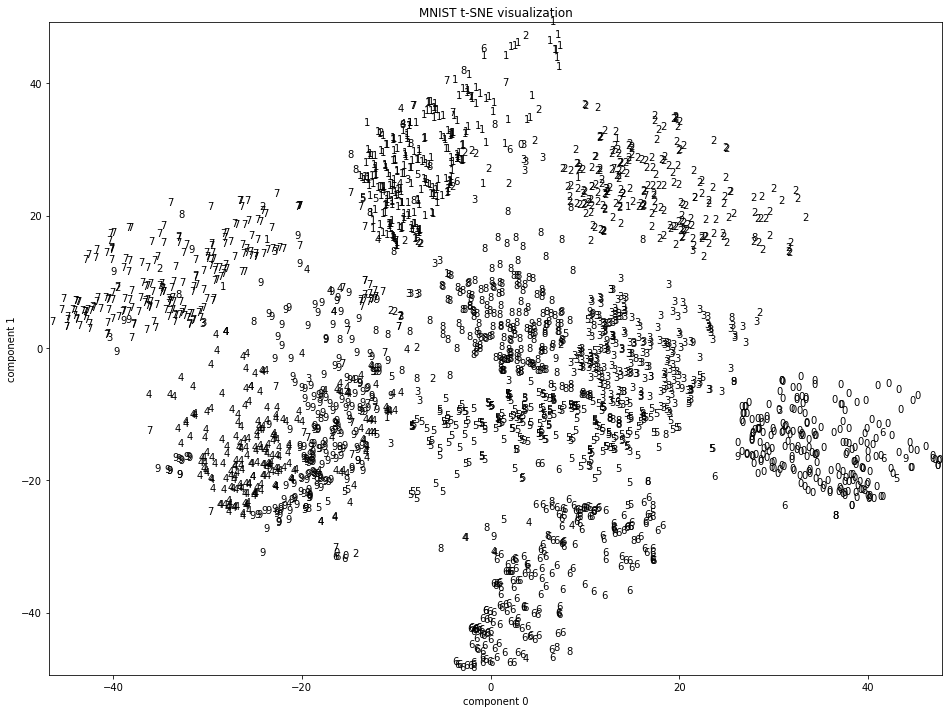

In [ ]:
bhtsne = BHTSNE(dimensions=2, perplexity=30.0, theta=0.5, rand_seed=-1)#, max_iter=10000)
mnist_tsne = bhtsne.fit_transform(mnist_data)

xmin = mnist_tsne[:,0].min()
xmax = mnist_tsne[:,0].max()
ymin = mnist_tsne[:,1].min()
ymax = mnist_tsne[:,1].max()

plt.figure( figsize=(16,12) )
for _y,_label in zip(mnist_tsne[::4],mnist_labels[::4]):
    plt.text(_y[0], _y[1], _label)
plt.axis([xmin,xmax,ymin,ymax])
plt.xlabel("component 0")
plt.ylabel("component 1")
plt.title("MNIST t-SNE visualization")
plt.show()